<a href="https://colab.research.google.com/github/sandeep92134/PYTHON-Data-Cleaning/blob/master/Chapter%204/Exersize%203.%20Identifying%20outliers%20and%20unexpected%20values%20in%20bivariate%20relationships%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 75)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 20)
pd.options.display.float_format = '{:,.2f}'.format
covidtotals = pd.read_csv("https://raw.githubusercontent.com/sandeep92134/PYTHON-Data-Cleaning/master/Chapter%204/datasets/covidtotals.csv")
covidtotals.set_index("iso_code", inplace=True)

# set up the cumulative and demographic columns
totvars = ['location','total_cases','total_deaths','total_cases_pm',
  'total_deaths_pm']
demovars = ['population','pop_density','median_age','gdp_per_capita',
  'hosp_beds']

In [3]:
# generate a correlation matrix of the cumulative and demographic data
covidtotals.corr(method="pearson")

,total_cases,total_deaths,total_cases_pm,...,median_age,gdp_per_capita,hosp_beds
total_cases,1.00,0.93,0.18,...,0.16,0.19,0.03
total_deaths,0.93,1.00,0.18,...,0.21,0.20,0.02
total_cases_pm,0.18,0.18,1.00,...,0.31,0.65,0.08
total_deaths_pm,0.25,0.39,0.59,...,0.39,0.38,0.12
population,0.27,0.21,-0.06,...,0.02,-0.06,-0.04
pop_density,-0.03,-0.03,0.11,...,0.18,0.32,0.31
median_age,0.16,0.21,0.31,...,1.00,0.65,0.66
gdp_per_capita,0.19,0.20,0.65,...,0.65,1.00,0.30
hosp_beds,0.03,0.02,0.08,...,0.66,0.30,1.00


In [4]:
# get descriptive statistics on the cumulative values
covidtotalsonly = covidtotals.loc[:, totvars]

In [5]:
# see if some countries have unexpected low or high death rates given number of cases
covidtotalsonly['total_cases_q'] = pd.\
  qcut(covidtotalsonly['total_cases'],
  labels=['very low','low','medium',
  'high','very high'], q=5, precision=0)
covidtotalsonly['total_deaths_q'] = pd.\
  qcut(covidtotalsonly['total_deaths'],
  labels=['very low','low','medium',
  'high','very high'], q=5, precision=0)

pd.crosstab(covidtotalsonly.total_cases_q,
  covidtotalsonly.total_deaths_q)

total_deaths_q,very low,low,medium,high,very high
total_cases_q,,,,,
very low,34,7,1,0,0
low,12,19,10,1,0
medium,1,13,15,13,0
high,0,0,12,24,6
very high,0,0,2,4,36


In [6]:
covidtotals.loc[(covidtotals.total_cases<300000) & (covidtotals.total_deaths>20000)].T

iso_code,FRA,ITA,ESP,GBR
lastdate,2020-06-01,2020-06-01,2020-05-31,2020-06-01
location,France,Italy,Spain,United Kingdom
total_cases,151753,233019,239429,274762
total_deaths,28802,33415,27127,38489
total_cases_pm,"2,324.88","3,853.99","5,120.95","4,047.40"
total_deaths_pm,441.25,552.66,580.20,566.97
population,"65,273,512.00","60,461,828.00","46,754,783.00","67,886,004.00"
pop_density,122.58,205.86,93.11,272.90
median_age,42.00,47.90,45.50,40.80
gdp_per_capita,"38,605.67","35,220.08","34,272.36","39,753.24"


In [7]:
covidtotals.loc[(covidtotals.total_cases>300000) & (covidtotals.total_deaths<10000)].T

iso_code,RUS
lastdate,2020-06-01
location,Russia
total_cases,405843
total_deaths,4693
total_cases_pm,"2,780.99"
total_deaths_pm,32.16
population,"145,934,460.00"
pop_density,8.82
median_age,39.60
gdp_per_capita,"24,765.95"


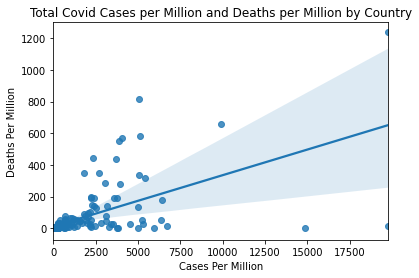

In [8]:
# do a scatterplot of total_cases by total_deaths
ax = sns.regplot(x="total_cases_pm", y="total_deaths_pm", data=covidtotals)
ax.set(xlabel="Cases Per Million", ylabel="Deaths Per Million", title="Total Covid Cases per Million and Deaths per Million by Country")
plt.show()

In [9]:
covidtotals.loc[(covidtotals.total_cases_pm<7500) \
  & (covidtotals.total_deaths_pm>250),\
  ['location','total_cases_pm','total_deaths_pm']]

,location,total_cases_pm,total_deaths_pm
iso_code,,,
BEL,Belgium,"5,037.35",816.85
FRA,France,"2,324.88",441.25
IRL,Ireland,"5,060.96",334.56
IMN,Isle of Man,"3,951.45",282.25
ITA,Italy,"3,853.99",552.66
JEY,Jersey,"3,047.30",286.92
NLD,Netherlands,"2,710.38",347.60
SXM,Sint Maarten (Dutch part),"1,795.62",349.80
ESP,Spain,"5,120.95",580.20


In [10]:
covidtotals.loc[(covidtotals.total_cases_pm>5000) \
  & (covidtotals.total_deaths_pm<=50), \
  ['location','total_cases_pm','total_deaths_pm']]

,location,total_cases_pm,total_deaths_pm
iso_code,,,
BHR,Bahrain,"6,698.47",11.17
GIB,Gibraltar,"5,016.18",0.00
ISL,Iceland,"5,292.31",29.30
KWT,Kuwait,"6,332.42",49.64
QAT,Qatar,"19,753.15",13.19
SGP,Singapore,"5,962.73",3.93
VAT,Vatican,"14,833.13",0.00


In [11]:
covidtotals.loc[(covidtotals.total_cases>300000) & (covidtotals.total_deaths<10000)].T

iso_code,RUS
lastdate,2020-06-01
location,Russia
total_cases,405843
total_deaths,4693
total_cases_pm,"2,780.99"
total_deaths_pm,32.16
population,"145,934,460.00"
pop_density,8.82
median_age,39.60
gdp_per_capita,"24,765.95"


In [12]:
covidtotals.loc[(covidtotals.total_cases<300000) & (covidtotals.total_deaths>20000)].T

iso_code,FRA,ITA,ESP,GBR
lastdate,2020-06-01,2020-06-01,2020-05-31,2020-06-01
location,France,Italy,Spain,United Kingdom
total_cases,151753,233019,239429,274762
total_deaths,28802,33415,27127,38489
total_cases_pm,"2,324.88","3,853.99","5,120.95","4,047.40"
total_deaths_pm,441.25,552.66,580.20,566.97
population,"65,273,512.00","60,461,828.00","46,754,783.00","67,886,004.00"
pop_density,122.58,205.86,93.11,272.90
median_age,42.00,47.90,45.50,40.80
gdp_per_capita,"38,605.67","35,220.08","34,272.36","39,753.24"


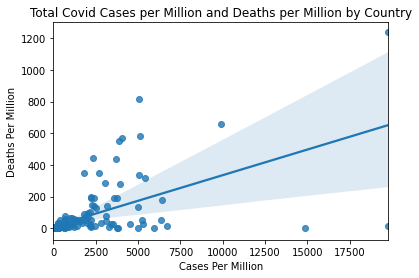

In [13]:
>>> ax = sns.regplot(x="total_cases_pm", y="total_deaths_pm", data=covidtotals)
>>> ax.set(xlabel="Cases Per Million", ylabel="Deaths Per Million", title="Total Covid Cases per Million and Deaths per Million by Country")
>>> plt.show()